# Extraction of the Whatsapp chat

To analyze the sentiments of a WhatsApp chat, we need to extract the chat by simply follow the steps mentioned below:

**For iPhone:**
Open your chat with a person or a group >
Just tap on the profile of the person or the group >
You will see an option to export chat down below.

**For Android:**
Open your chat with a person or a group >
Click on the three dots above >
Click on more >
Click on the export chat.

an option to attach media show-up while exporting chat. For simplicity, it is best not to attach media. Finally, enter your email and you will find WhatsApp chat in inbox.

# Importing the required libraries

In [ ]:
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Define required Functions 

In [ ]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    else:
        return False

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message
    

# Preparing data

In [ ]:
data=[]
conversation="/content/WhatsApp Chat with Sphinx Worldbiz.txt"
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# analyse the sentiments

In [ ]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Time,contact,Message,positive,negative,neutral
0,2022-02-17,1:08 PM,Mayank,Sir i want to inquiry about the cloud computin...,0.126,0.0,0.874
1,2022-02-17,1:08 PM,Mayank,What's the purpose of that group?,0.000,0.0,1.000
2,2022-02-17,1:08 PM,Mayank,And what's my role?,0.000,0.0,1.000
3,2022-02-17,1:50 PM,Sphinx Worldbiz,It's AICT Intern group,0.000,0.0,1.000
4,2022-02-17,1:50 PM,Mayank,What's my role in this internship,0.000,0.0,1.000
5,2022-02-17,1:50 PM,Mayank,And what I need to do to complete this internship,0.000,0.0,1.000
6,2022-02-17,1:51 PM,Sphinx Worldbiz,Send your CV,0.000,0.0,1.000
7,2022-02-17,1:52 PM,Sphinx Worldbiz,If you interested in internship,0.403,0.0,0.597
8,2022-02-17,1:53 PM,Mayank,Ok sir... I'll send you as soon as I reach home.,0.292,0.0,0.708
9,2022-02-17,3:05 PM,Sphinx Worldbiz,Ok,1.000,0.0,0.000


# Checking sentiment score


In [ ]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    elif (c>a) and (c>b):
        print("Neutral 🙂 ")

sentiment_score(x, y, z)

Neutral 🙂 


# Generating Wordcloud image


There are 584 words in all the messages.


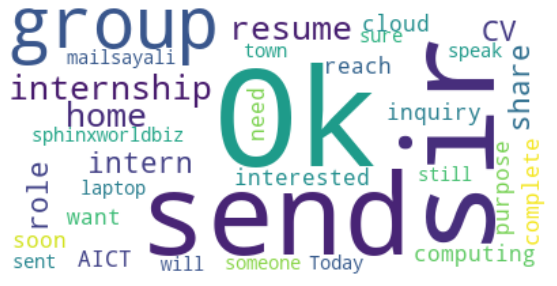

In [ ]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()